### Importing libraries 

In [127]:
import pandas as pd
import seaborn as sns
import numpy as np
from dateutil import parser
import matplotlib.pyplot as plt

### Importing Data

In [128]:
# df = pd.read_csv('../data/ytdataframe.csv')

df = pd.read_csv('../data/ytunlabeled2.csv')
dff = pd.read_csv('../data/ytdataframe.csv')

In [129]:
df = df.drop(['Unnamed: 0.1', 'Unnamed: 0', 'Unnamed: 0.5','Unnamed: 0.4','Unnamed: 0.3','Unnamed: 0.2'], axis=1)

df.head(1)

,video_id,avg polarity score,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,subscribers,totalViews,totalVideos
0,jGwO_UgTS7I,0.277473,Stanford Online,"Stanford CS229: Machine Learning Course, Lectu...",For more information about Stanford’s Artifici...,"['Andrew Ng', 'Computer Science', 'Stanford', ...",2020-04-17T20:07:45Z,1410150,18797,NaN,76,PT1H15M20S,hd,True,369000,20517888,1850


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565 entries, 0 to 564
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   video_id            565 non-null    object 
 1   avg polarity score  565 non-null    float64
 2   channelTitle        565 non-null    object 
 3   title               565 non-null    object 
 4   description         536 non-null    object 
 5   tags                507 non-null    object 
 6   publishedAt         565 non-null    object 
 7   viewCount           565 non-null    int64  
 8   likeCount           565 non-null    int64  
 9   favouriteCount      0 non-null      float64
 10  commentCount        565 non-null    int64  
 11  duration            565 non-null    object 
 12  definition          565 non-null    object 
 13  caption             565 non-null    bool   
 14  subscribers         565 non-null    int64  
 15  totalViews          565 non-null    int64  
 16  totalVid

# Data preprocessing 

Checking duplicates

In [131]:
df.duplicated().sum()


0

In [132]:
df = df.drop_duplicates()
df.shape

(565, 17)

Checking null values

In [133]:
df.isnull().sum()


video_id                0
avg polarity score      0
channelTitle            0
title                   0
description            29
tags                   58
publishedAt             0
viewCount               0
likeCount               0
favouriteCount        565
commentCount            0
duration                0
definition              0
caption                 0
subscribers             0
totalViews              0
totalVideos             0
dtype: int64

Convert publish date to year

In [134]:
df['publishedAt'] = df['publishedAt'].apply(lambda x: parser.parse(x)) 
df['pushblishYear'] = df['publishedAt'].apply(lambda x: x.strftime("%Y"))

dff['publishedAt'] = dff['publishedAt'].apply(lambda x: parser.parse(x)) 
dff['pushblishYear'] = dff['publishedAt'].apply(lambda x: x.strftime("%Y"))

Convert count columns to numeric


In [135]:
numeric_cols = ['viewCount', 'likeCount', 'commentCount', 'pushblishYear']

df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors = 'coerce', axis = 1)

dff[numeric_cols] = dff[numeric_cols].apply(pd.to_numeric, errors = 'coerce', axis = 1)

Convert duration to seconds

In [136]:
import isodate
df['durationSecs'] = df['duration'].apply(lambda x: isodate.parse_duration(x))
df['durationSecs'] = df['durationSecs'].astype('timedelta64[s]')

dff['durationSecs'] = dff['duration'].apply(lambda x: isodate.parse_duration(x))
dff['durationSecs'] = dff['durationSecs'].astype('timedelta64[s]')

Add tag count

In [137]:


df['tagCount'] = df['tags'].apply(lambda x: 0 if x is np.nan else len(x))

dff['tagCount'] = dff['tags'].apply(lambda x: 0 if x is np.nan else len(x))

Add title and description length

In [138]:
df['title length'] = df['title'].apply(lambda x: 0 if x is np.nan else len(x))
df['description length'] = df['description'].apply(lambda x: 0 if x is np.nan else len(x))

dff['title length'] = dff['title'].apply(lambda x: 0 if x is np.nan else len(x))
dff['description length'] = dff['description'].apply(lambda x: 0 if x is np.nan else len(x))


In [139]:
# df['Label'] = df['Label'].apply(lambda x: 'Unlabeled' if x is np.nan else x)


Dropping columns we wont use

In [140]:
df = df.drop(['description', 'title', 'publishedAt', 'duration', 'favouriteCount', 'video_id', 'tags'], axis=1)

dff = dff.drop(['Unnamed: 0', 'description', 'title', 'publishedAt', 'duration', 'favouriteCount', 'video_id', 'tags'], axis=1)


# Modeling

In [141]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

Label encoding 

In [142]:
le = LabelEncoder()

df2 = ['channelTitle', 'definition', 'caption']

df[df2] = df[df2].apply(le.fit_transform)

dffs = ['channelTitle', 'definition', 'caption', 'Label']
dff[dffs] = dff[dffs].apply(le.fit_transform)

df.isnull().sum()

avg polarity score    0
channelTitle          0
viewCount             0
likeCount             0
commentCount          0
definition            0
caption               0
subscribers           0
totalViews            0
totalVideos           0
pushblishYear         0
durationSecs          0
tagCount              0
title length          0
description length    0
dtype: int64

Splitting

In [143]:
# from sklearn.preprocessing import StandardScaler
# scale = StandardScaler()


feat_col = ['channelTitle', 'viewCount', 'likeCount', 'definition', 'commentCount', 'caption', 'subscribers', 'totalViews', 'totalVideos', 'avg polarity score', 'pushblishYear', 'durationSecs', 'tagCount', 'description length', 'title length']

X = df[feat_col] # Features
# y = df['Label'] # Target variable

Scaling

In [144]:
cols = X.columns

from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [145]:
X = pd.DataFrame(X, columns=[cols])

X.head()

,channelTitle,viewCount,likeCount,definition,commentCount,caption,subscribers,totalViews,totalVideos,avg polarity score,pushblishYear,durationSecs,tagCount,description length,title length
0,0.631579,0.175913,0.104714,0.0,0.009200,1.0,0.060143,0.049874,0.794849,0.432374,0.75,0.096393,0.262963,0.220576,0.727273
1,0.631579,0.069989,0.036559,0.0,0.003753,1.0,0.060143,0.049874,0.794849,0.365947,0.75,0.100189,0.296296,0.083055,1.000000
2,0.631579,0.032957,0.014636,0.0,0.001211,1.0,0.060143,0.049874,0.794849,0.368149,0.75,0.101840,0.092593,0.069073,0.988636
3,0.631579,0.016085,0.006067,0.0,0.000363,1.0,0.060143,0.049874,0.794849,0.370698,0.75,0.105014,0.135185,0.062396,0.977273
4,0.631579,0.015701,0.007181,0.0,0.000968,1.0,0.060143,0.049874,0.794849,0.381210,0.75,0.100939,0.159259,0.069073,0.863636


### K-Means model with two clusters

In [146]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=16) 

kmeans.fit(X)


KMeans(n_clusters=2, random_state=16)

### Model evaluation

In [147]:
kmeans.inertia_

281.2563143731306

Find the labels

In [148]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
# correct_labels = sum(y == labels)

# print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

# print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

In [149]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

Use elbow method to find optimal number of clusters

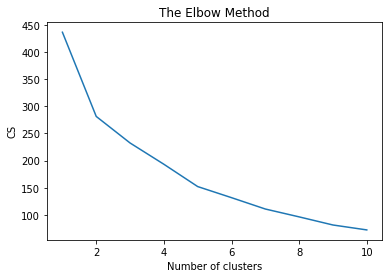

In [150]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 16)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

## Labeling the data

In [151]:
df['Label'] = None

df = df.assign(Label = labels)

df.head()

,avg polarity score,channelTitle,viewCount,likeCount,commentCount,definition,caption,subscribers,totalViews,totalVideos,pushblishYear,durationSecs,tagCount,title length,description length,Label
0,0.277473,12,1410150,18797,76,0,1,369000,20517888,1850,2020,4520.0,142,76,1057,1
1,0.234844,12,561083,6564,31,0,1,369000,20517888,1850,2020,4697.0,160,100,398,1
2,0.236257,12,264242,2629,10,0,1,369000,20517888,1850,2020,4774.0,50,99,331,1
3,0.237893,12,129002,1091,3,0,1,369000,20517888,1850,2020,4922.0,73,98,299,1
4,0.244639,12,125920,1291,8,0,1,369000,20517888,1850,2020,4732.0,86,88,331,1


1    359
0    206
Name: Label, dtype: int64

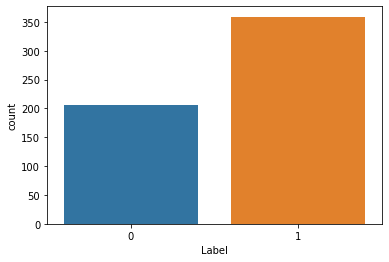

In [152]:
sns.countplot(x="Label", data=df)
df["Label"].value_counts()

# Modeling

In [153]:
# from sklearn.preprocessing import StandardScaler
# scale = StandardScaler()

feat_col = ['channelTitle', 'viewCount', 'likeCount', 'definition', 'commentCount', 'caption', 'subscribers', 'totalViews', 'totalVideos', 'avg polarity score', 'pushblishYear', 'durationSecs', 'tagCount', 'description length', 'title length']

X = df[feat_col] # Features
y = df['Label']# Target variable

A = dff[feat_col] # Features
b = dff['Label']# Target variable


In [154]:
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

#Create an oversampled training data
smote = SMOTE(random_state = 16)
X_train, y_train = smote.fit_resample(X_train, y_train)

A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.25, random_state=16)


### Log

In [155]:
from random import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

logreg = LogisticRegression(max_iter=1000)
cross_val = KFold(n_splits=5, random_state=16, shuffle=True)
scores = cross_val_score(logreg, X_train, y_train, cv=cross_val, scoring='roc_auc')
print("Mean AUC Score - Logistic Regression: ", scores.mean())

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

Mean AUC Score - Logistic Regression:  0.9988994864269992


In [156]:
from sklearn.metrics import classification_report
target_names = ['reputable', 'non reputable']
print(classification_report(y_test, y_pred, target_names=target_names))
print("Train Accuracy:",logreg.score(X_train, y_train))
print("Test Accuracy:",logreg.score(X_test, y_test))

               precision    recall  f1-score   support

    reputable       1.00      1.00      1.00        44
non reputable       1.00      1.00      1.00        98

     accuracy                           1.00       142
    macro avg       1.00      1.00      1.00       142
 weighted avg       1.00      1.00      1.00       142

Train Accuracy: 1.0
Test Accuracy: 1.0


### Random forest

In [157]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier()
kfold = KFold(n_splits=5, random_state=16, shuffle=True) 
scores = cross_val_score(model1, X_train, y_train, cv=kfold, scoring='roc_auc')
print("Mean AUC Score - Random Forest: ", scores.mean())

Mean AUC Score - Random Forest:  1.0


In [158]:
# fit the model with data
model1.fit(X_train, y_train)

rf_pred = model1.predict(X_test)

print("Random Forest Train Accuracy:",model1.score(X_train, y_train))
print("Random Forest Test Accuracy:",model1.score(X_test, y_test))
target_names = ['reputable', 'non reputable']
print(classification_report(y_test, rf_pred, target_names=target_names))

Random Forest Train Accuracy: 1.0
Random Forest Test Accuracy: 1.0
               precision    recall  f1-score   support

    reputable       1.00      1.00      1.00        44
non reputable       1.00      1.00      1.00        98

     accuracy                           1.00       142
    macro avg       1.00      1.00      1.00       142
 weighted avg       1.00      1.00      1.00       142



### Decision tree

In [159]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
cross_val = KFold(n_splits=5, random_state=16, shuffle=True)
scores = cross_val_score(model2, X_train, y_train, cv=cross_val, scoring='roc_auc')
print("Mean AUC Score - Decision Tree: ", scores.mean())

Mean AUC Score - Decision Tree:  1.0


In [160]:
# fit the model with data
model2.fit(X_train, y_train)

dc_pred = model2.predict(X_test)

print("Decision Tree Train Accuracy:",model2.score(X_train, y_train))
print("Decision Tree Test Accuracy:",model2.score(X_test, y_test))
target_names = ['reputable', 'non reputable']
print(classification_report(y_test, dc_pred, target_names=target_names))


Decision Tree Train Accuracy: 1.0
Decision Tree Test Accuracy: 1.0
               precision    recall  f1-score   support

    reputable       1.00      1.00      1.00        44
non reputable       1.00      1.00      1.00        98

     accuracy                           1.00       142
    macro avg       1.00      1.00      1.00       142
 weighted avg       1.00      1.00      1.00       142



### XGBClassifier

In [161]:
from xgboost import XGBClassifier
model4 = XGBClassifier()
cross_val = KFold(n_splits=5, random_state=16, shuffle=True)
scores = cross_val_score(model4, X_train, y_train, cv=cross_val, scoring='roc_auc')
print("Mean AUC Score - Gaussian Naive Bayes: ", scores.mean())

Mean AUC Score - Gaussian Naive Bayes:  1.0


In [162]:
# fit the model with data
model4.fit(X_train, y_train)

xgb_pred = model4.predict(X_test)

print("XGB Train Accuracy:",model4.score(X_train, y_train))
print("XGB Test Accuracy:",model4.score(X_test, y_test))
target_names = ['reputable', 'non reputable']
print(classification_report(y_test, xgb_pred, target_names=target_names))

XGB Train Accuracy: 1.0
XGB Test Accuracy: 1.0
               precision    recall  f1-score   support

    reputable       1.00      1.00      1.00        44
non reputable       1.00      1.00      1.00        98

     accuracy                           1.00       142
    macro avg       1.00      1.00      1.00       142
 weighted avg       1.00      1.00      1.00       142



### KNN

In [163]:
from sklearn.neighbors import KNeighborsClassifier
model5 = KNeighborsClassifier()
cross_val = KFold(n_splits=5, random_state=16, shuffle=True)
scores = cross_val_score(model5, X_train, y_train, cv=cross_val, scoring='roc_auc')
print("Mean AUC Score - K-Nearest Neighbors: ", scores.mean())

Mean AUC Score - K-Nearest Neighbors:  1.0


In [164]:
# fit the model with data
model5.fit(X_train, y_train)

k_pred = model5.predict(X_test)

print("KNN Train Accuracy:",model5.score(X_train, y_train))
print("KNN Test Accuracy:",model5.score(X_test, y_test))

KNN Train Accuracy: 1.0
KNN Test Accuracy: 1.0


In [170]:
print("LogReg Train Accuracy:",model1.score(A_train, b_train))
print("LogReg Test Accuracy:",model1.score(A_test, b_test))

LogReg Train Accuracy: 0.5416666666666666
LogReg Test Accuracy: 0.575


# Save model

In [166]:
# import pickle

# pickle.dump(LP_knn, open('LP_knn_Model', 'wb'))